In [4]:
#classical computing search a element in an unsorted list O(N)

list = [1, 3, 7, 2, 9, 5, 4, 8]

def oracle(input):
    winner = 5
    if input is winner:
        return True;
    return False;

for index, number in enumerate(list):
    if oracle(number) is True:
        print('Winner found at index %i'%index)
        print('%i calls to oracle'%(index+1))
        break

Winner found at index 5
6 calls to oracle


Winner found at index 5
6 calls to oracle


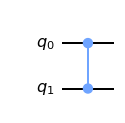

In [10]:
#quantum computing search an element in an unsorted list (squareroot(N))
from qiskit import *
import matplotlib.pyplot as plt
import numpy as np

oracleGate = QuantumCircuit(2, name='oracleGate')
#flipping the sign of the winning state with a controlled Z gate
oracleGate.cz(0, 1)
oracleGate.to_gate()
oracleGate.draw()

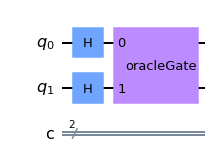

In [11]:
#check that the oracle is doing the good thing
backend = Aer.get_backend('statevector_simulator')
groverCircuit = QuantumCircuit(2, 2)
# put the 2 qubits in a superposition state by using Hadamard Gate
groverCircuit.h([0, 1])
# apply the oracle on the 2 qubits
groverCircuit.append(oracleGate, [0, 1])
groverCircuit.draw()


In [12]:
job = execute(groverCircuit, backend)
result = job.result()

sv = result.get_statevector()
np.around(sv, 2)

array([ 0.5+0.j,  0.5+0.j,  0.5+0.j, -0.5+0.j])

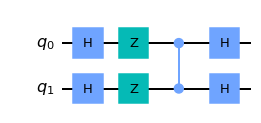

In [16]:
#now the qubits are in superposition state and the oracle is applied
#we need to apply a reflection operator to reveal the probabilities 
#means we apply amplitude amplification in order to amplify the probability
#of the winning state and to reduce the probability of non winning state
reflectionGate = QuantumCircuit(2, name='reflectionGate')
reflectionGate.h([0, 1])
reflectionGate.z([0, 1])
reflectionGate.cz(0, 1)
reflectionGate.h([0, 1])
reflectionGate.to_gate()
reflectionGate.draw()

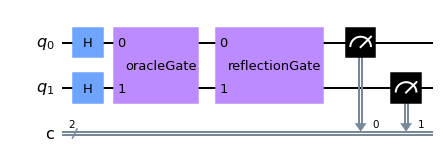

In [21]:
back_end = Aer.get_backend('qasm_simulator')
groverCircuit = QuantumCircuit(2,2)

groverCircuit.initialize([0, 0], 1)
groverCircuit.h([0,1])
groverCircuit.append(oracleGate, [0, 1])
groverCircuit.append(reflectionGate, [0, 1])
groverCircuit.measure([0, 1], [0,1])
groverCircuit.draw()

In [23]:
job=execute(groverCircuit, backend, shots=1)
result = job.result()
result.get_counts()

{'11': 1}